___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [2]:
#Data
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df = pd.read_csv("./KNN_Project_Data")

**Check the head of the dataframe.**

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

/home/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


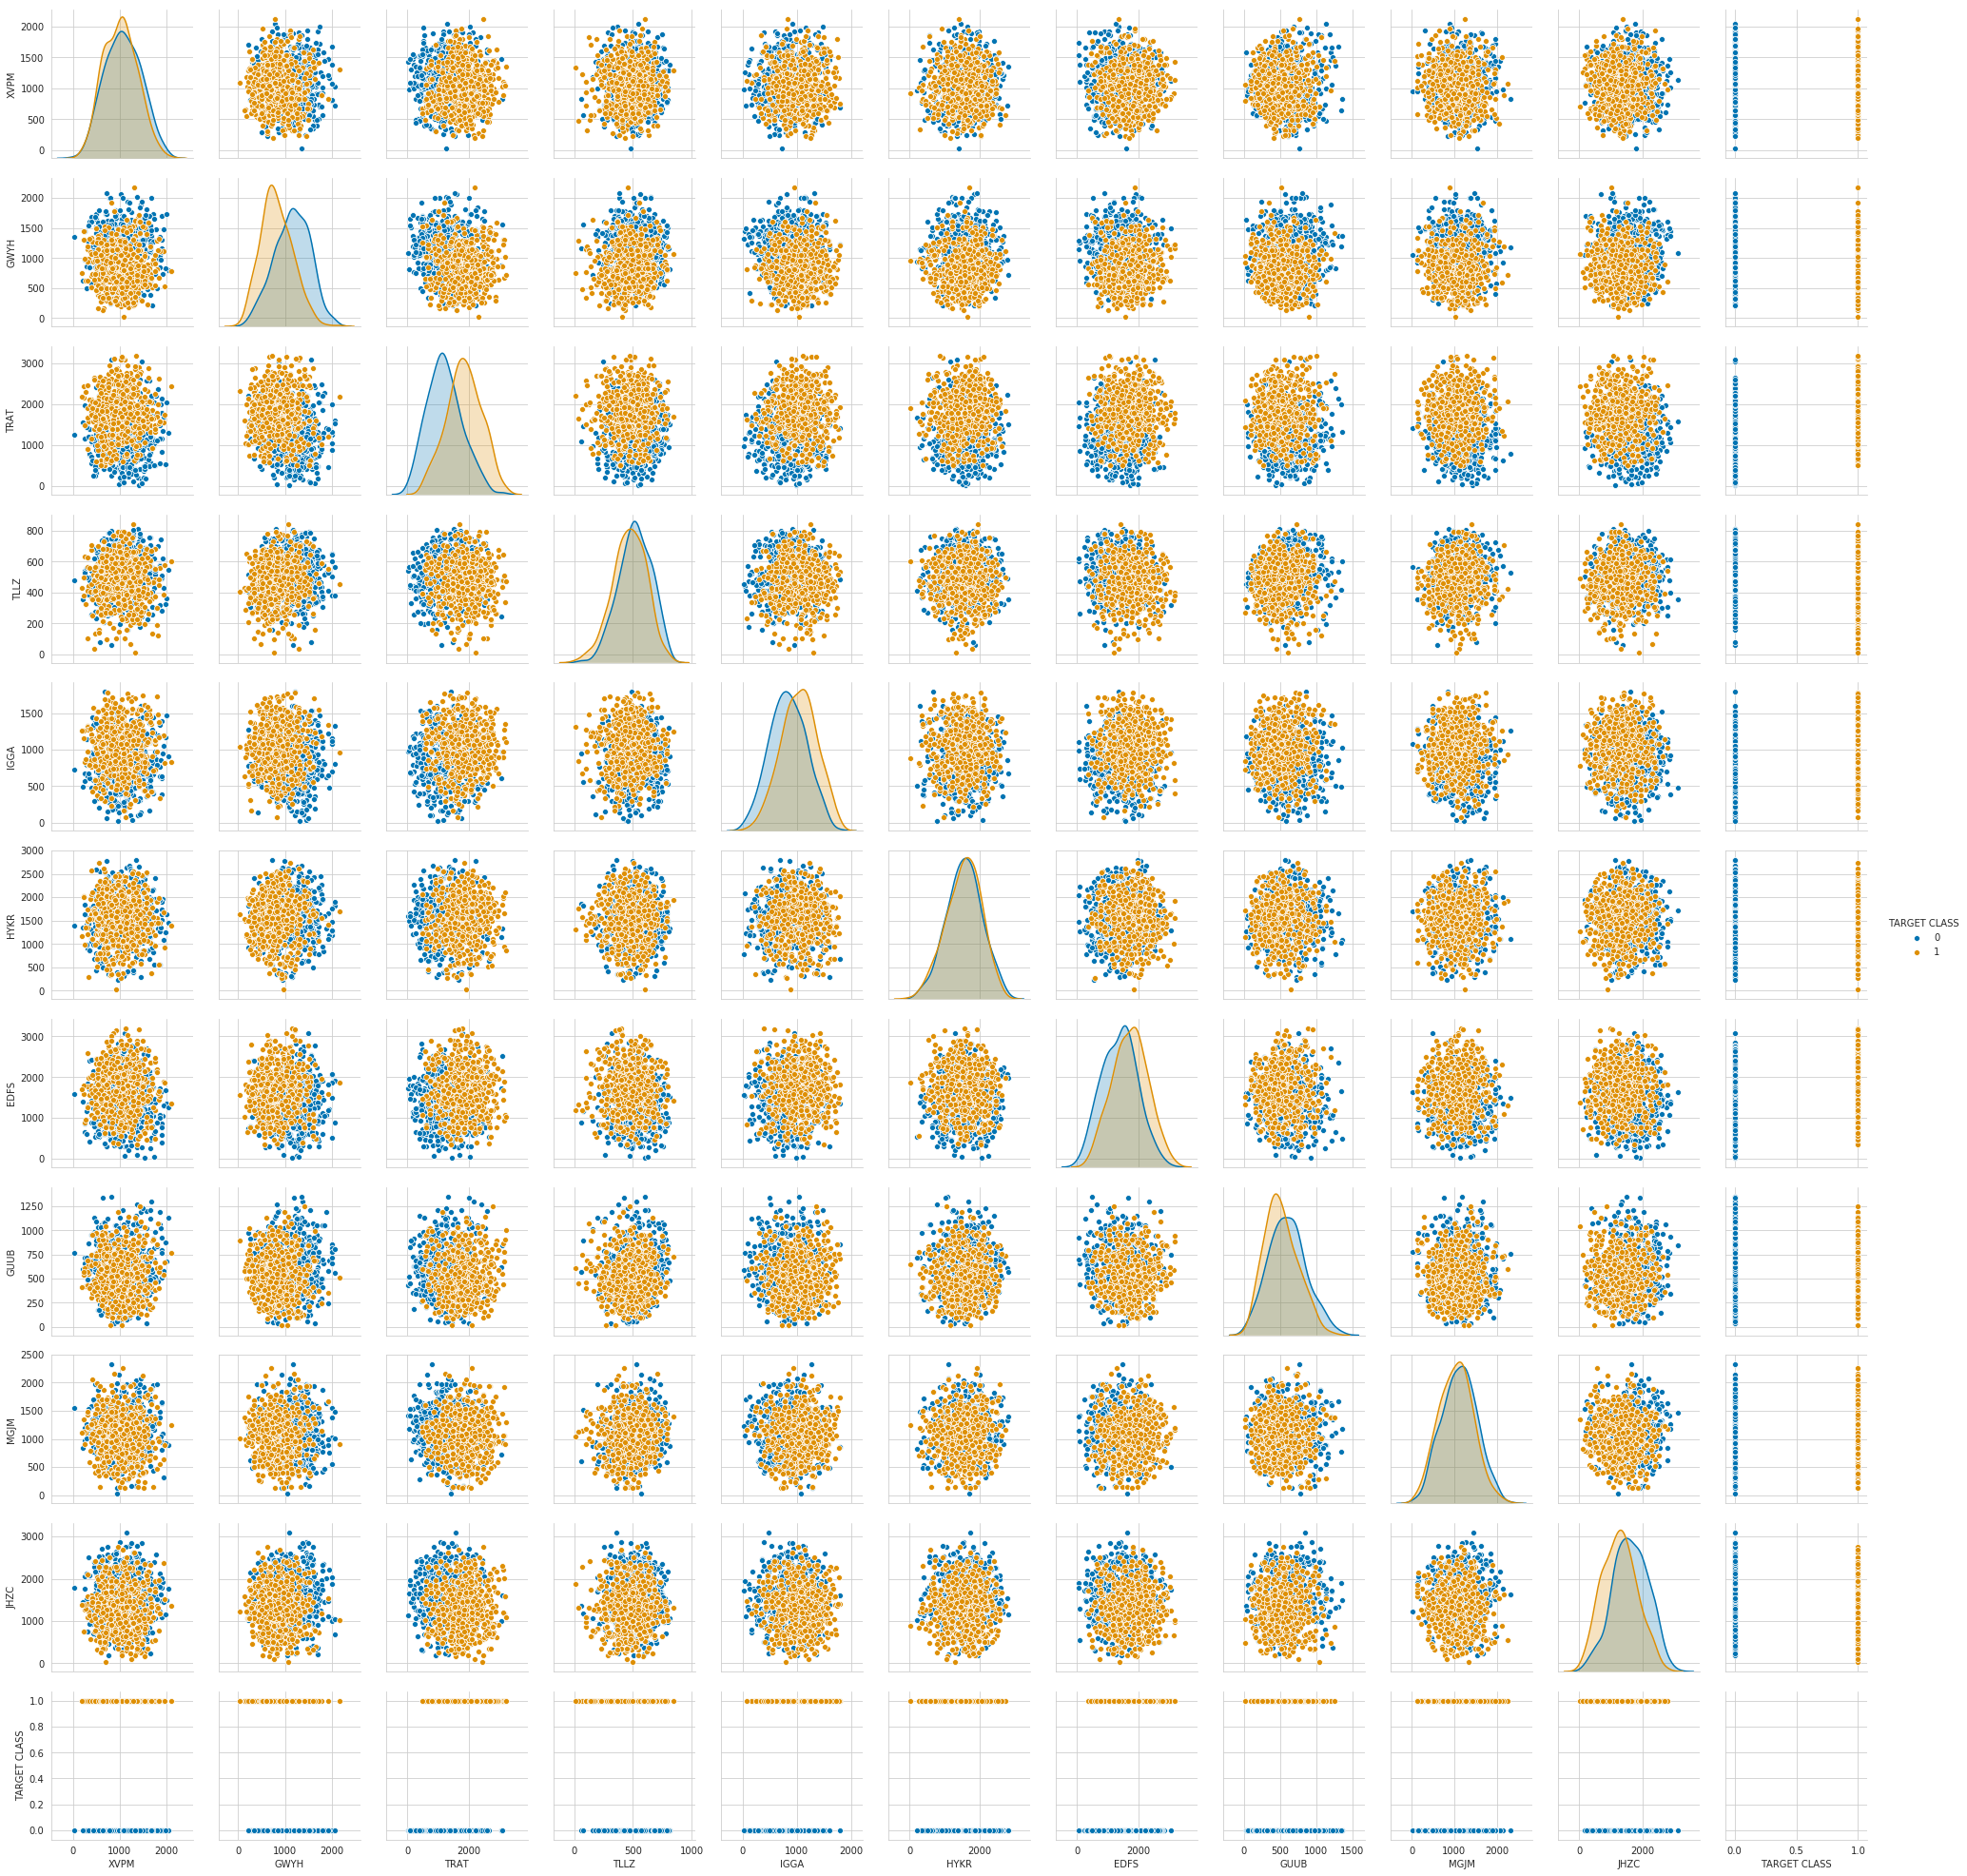

In [8]:
sns.pairplot(df.dropna(),hue="TARGET CLASS",palette="colorblind")

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [9]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [10]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [11]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [12]:
scaler.transform(df.drop("TARGET CLASS",axis=1))

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [14]:
scaler_feature = pd.DataFrame(scaler.transform(df.drop("TARGET CLASS",axis=1)),columns=df.drop("TARGET CLASS",axis=1).columns)

In [15]:
scaler_feature.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [16]:
from sklearn.cross_validation import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaler_feature,df["TARGET CLASS"],test_size=0.3, random_state=42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [20]:
knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=1)

**Fit this KNN model to the training data.**

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [22]:

predicted_y = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(predicted_y,y_test))

[[110  47]
 [ 36 107]]


In [25]:
print(classification_report(predicted_y,y_test))

             precision    recall  f1-score   support

          0       0.75      0.70      0.73       157
          1       0.69      0.75      0.72       143

avg / total       0.73      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [28]:
error_rate = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=i)
    knn.fit(X_train,y_train)
    predicted_y = knn.predict(X_test)
    error_rate.append(np.mean(predicted_y != y_test))

**Now create the following plot using the information from your for loop.**

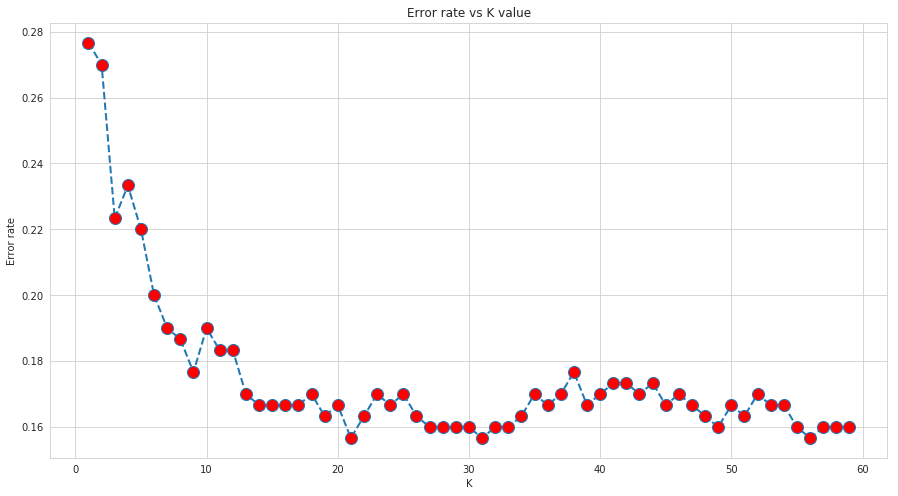

In [37]:
plt.figure(figsize=(15,8))
plt.plot((range(1,60)),error_rate,marker='o',
         linestyle='dashed',linewidth=2, markersize=12,markerfacecolor='red')
plt.title("Error rate vs K value")
plt.xlabel("K")
plt.ylabel("Error rate")
plt.show()

In [44]:
error_rate[30]

0.15666666666666668

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [47]:
knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=20)
knn.fit(X_train,y_train)
predicted_y = knn.predict(X_test)

In [48]:
print("WITH K = 20")
print(confusion_matrix(predicted_y,y_test))
print(classification_report(predicted_y,y_test))

WITH K = 20
[[128  32]
 [ 18 122]]
             precision    recall  f1-score   support

          0       0.88      0.80      0.84       160
          1       0.79      0.87      0.83       140

avg / total       0.84      0.83      0.83       300



## Using Randomized Parameter Optimization

**Let's see if we can randomized the parameter optimization.**

In [59]:
from sklearn.grid_search import RandomizedSearchCV

parameters = {"n_neighbors": range(0,60),
"weights": ["uniform", "distance"]}
rsearch = RandomizedSearchCV(estimator=knn,
param_distributions=parameters, cv=4, n_iter=50,random_state=5,n_jobs=-1)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.8314285714285714
{'weights': 'uniform', 'n_neighbors': 56}


## Using Grid Search 
**Looking for the best parameters using Grid Search.**

In [63]:
from sklearn.grid_search import GridSearchCV
parameters = {"n_neighbors": np.arange(1,100),
"metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator=knn,
param_grid=parameters,n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

0.8442857142857143
95


# Great Job!